In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorboard as tb

In [66]:
# add the root dir to the path
import sys
sys.path.append('../')
log_dir_root = '../logs/'

In [67]:
import glob
from pathlib import Path

path = Path(log_dir_root)

# Get all the files in the directory with "tfevents" in their name
all_logs = list(path.glob('**/*tfevents*'))

In [83]:
def collect_log(prob_type, N):
    collected = []
    
    for _log in all_logs:
        if prob_type in str(_log) and f"N_{N}" in str(_log):
            collected.append(str(_log))
            
    return collected

In [84]:
target_logs = collect_log('tsp', 50)

In [85]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def parse_log_as_df(prob_type, N):
    target_logs = collect_log(prob_type, N)
    result = {}
    for _log in target_logs:
        print(_log)
        event_acc = EventAccumulator(_log)
        _, _, _, _, _, model, baseline, _, _ = _log.split("\\")
        activation = model.split("-")[5]
        baseline = baseline.split("-")[-1]
        
        feat_nm = f"{activation}-{baseline}"
        
        result[feat_nm] = []
        
            
        event_acc.Reload()
        
        # E. g. get wall clock, number of steps and value for a scalar 'Accuracy'
        scores = event_acc.Scalars('score/train_score_epoch')

        for i, item in enumerate(scores):
            result[feat_nm].append(item.value)
            
    result = pd.DataFrame.from_dict(result)
    return result

..\logs\pretrained_result\tsp\N_100-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1688169839.IDSL-kwj.11108.10
..\logs\pretrained_result\tsp\N_100-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687883282.IDSL-kwj.11108.8
..\logs\pretrained_result\tsp\N_100-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1688311307.IDSL-kwj.11108.11
..\logs\pretrained_result\tsp\N_100-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1688024643.IDSL-kwj.11108.9


<AxesSubplot: title={'center': 'tsp-100'}, xlabel='epoch', ylabel='distance'>

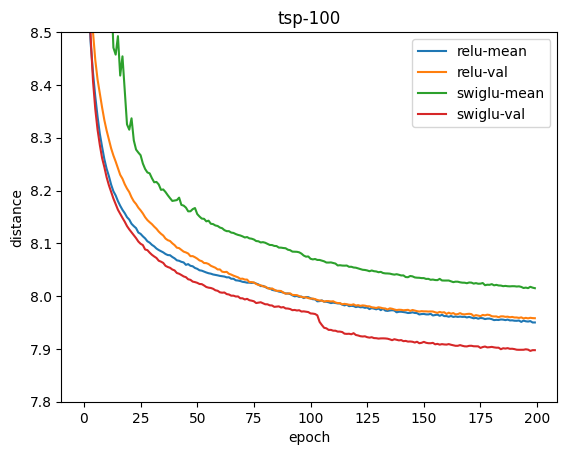

In [90]:
prob_type, N = 'tsp', 100
df = parse_log_as_df('tsp', N)
_ylim_table = {20: (3.83, 3.85), 50: (5.7, 6), 100: (7.8, 8.5)}
df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}")

..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687580932.IDSL-kwj.11108.2
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687531739.IDSL-kwj.11108.0
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687605164.IDSL-kwj.11108.3
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687556032.IDSL-kwj.11108.1
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687757701.IDSL-kwj.11108.6
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687629957.IDSL-kwj.11108.4
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfeve

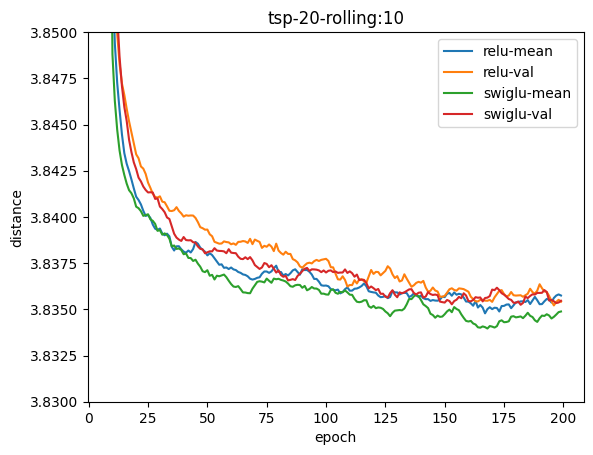

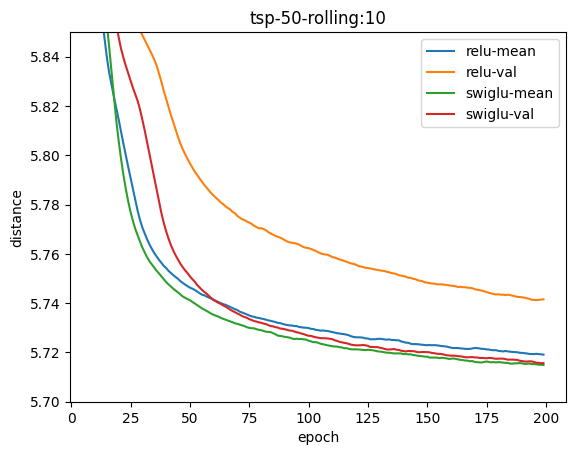

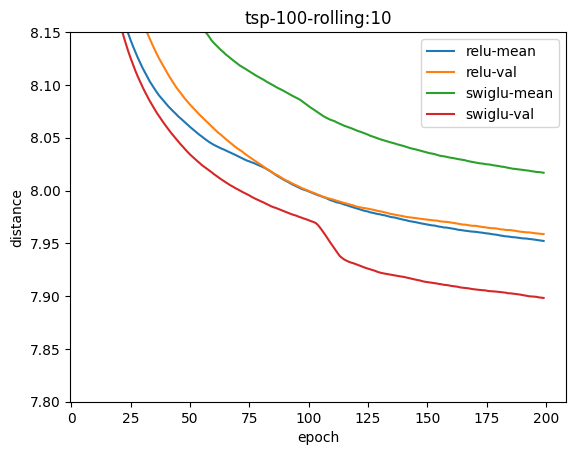

In [98]:
tsp_ylim_table = {20: (3.83, 3.85), 50: (5.7, 5.85), 100: (7.8, 8.15)}
rolling = 10

for prob_type in ['tsp']:
    
    if prob_type == 'tsp':
        _ylim_table = tsp_ylim_table
    
    for N in [20, 50, 100]:
        df = parse_log_as_df('tsp', N).rolling(rolling).mean()
        
        df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}-MA:{rolling}")
        

..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687580932.IDSL-kwj.11108.2
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687531739.IDSL-kwj.11108.0
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687605164.IDSL-kwj.11108.3
..\logs\pretrained_result\tsp\N_20-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687556032.IDSL-kwj.11108.1
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-mean\version_0\events.out.tfevents.1687757701.IDSL-kwj.11108.6
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-relu-10-0.0001\1562-1-val\version_0\events.out.tfevents.1687629957.IDSL-kwj.11108.4
..\logs\pretrained_result\tsp\N_50-B_64\shared_mha-128-6-32-4-swiglu-10-0.0001\1562-1-mean\version_0\events.out.tfeve

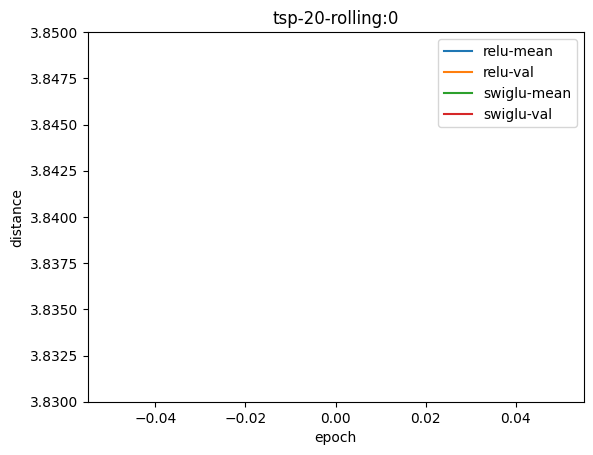

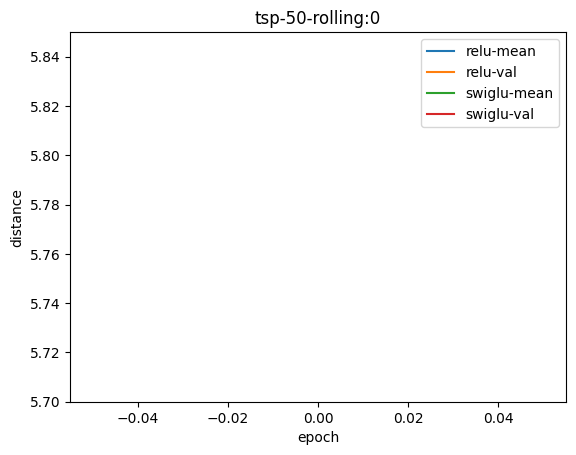

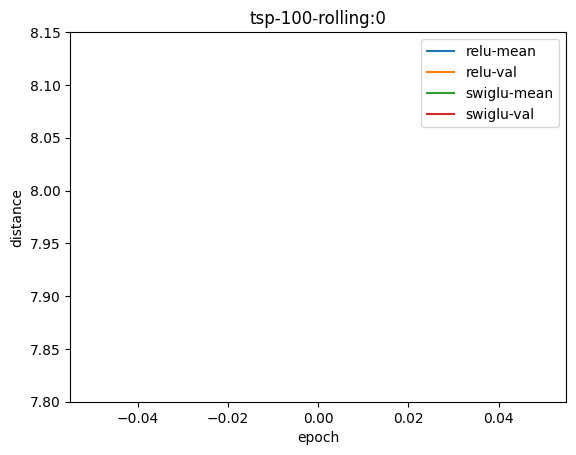

In [99]:
tsp_ylim_table = {20: (3.83, 3.85), 50: (5.7, 5.85), 100: (7.8, 8.15)}
rolling = 0

for prob_type in ['tsp']:
    
    if prob_type == 'tsp':
        _ylim_table = tsp_ylim_table
    
    for N in [20, 50, 100]:
        df = parse_log_as_df('tsp', N).rolling(rolling).mean()
        
        df.plot(ylim=_ylim_table[N], xlabel="epoch", ylabel="distance", title=f"{prob_type}-{N}-rolling:{rolling}")
        